In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
import seaborn as sns

sns.set()

data = pd.read_csv('D:\\Projects\Data\\train.csv',nrows = 10000000)       # Contains the first 10 million data from 
                                                    # where we are going to select 1 million ramdom data for training and
                                                    # ten thousand data for deveopment 


In [2]:
# Creation of training set , development set and test set 
training_set = data.sample(n = 1000000 , replace = False)    # 1 million random data from same distribution
dev_set = data.sample(n = 10000 , replace = False)           # 10000 random data from same distribution
test_set =  pd.read_csv('D:\\Projects\\Data\\test.csv')      # Actual test data must be used to check only after getting 
                                                             # a good final hypothesis

# Shape, data type, data sample and descriptive statistics of Training Set

### Shape

In [3]:
training_set.shape

(1000000, 8)

### Data Type

In [4]:
training_set.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

### Data Sample

In [5]:
training_set.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
855090,2012-01-02 01:54:04.0000002,10.1,2012-01-02 01:54:04 UTC,-73.984661,40.763839,-73.950463,40.776449,1
9971457,2012-07-21 16:47:19.0000004,16.5,2012-07-21 16:47:19 UTC,-73.955019,40.769497,-73.961001,40.719281,1
3654940,2009-03-28 23:50:00.000000197,4.5,2009-03-28 23:50:00 UTC,-73.982275,40.731617,-73.974527,40.742427,2
9693586,2013-07-18 20:46:00.000000139,10.0,2013-07-18 20:46:00 UTC,-73.993910,40.761937,-74.003985,40.742045,1
10945,2011-10-21 13:01:35.0000005,4.9,2011-10-21 13:01:35 UTC,-73.983456,40.744779,-73.998862,40.738509,1


### Descriptive statistics 

In [6]:
training_set.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1000000.000000,1000000.000000,1000000.000000,999997.000000,999997.000000,1000000.000000
mean,11.348336,-72.522261,39.915717,-72.513593,39.922887,1.684712
std,9.812035,14.364761,9.627374,13.165044,9.773479,1.308746
min,-107.750000,-3384.693027,-3457.346617,-3018.391810,-2452.082942,0.000000
25%,6.000000,-73.992073,40.734885,-73.991399,40.733990,1.000000
50%,8.500000,-73.981806,40.752608,-73.980160,40.753093,1.000000
75%,12.500000,-73.967116,40.767135,-73.963659,40.768054,2.000000
max,698.160000,2816.000388,2977.030610,2820.124643,3320.686797,49.000000


# Shape, data type, data sample and descriptive statistics of Development Set

### Shape

In [7]:
dev_set.shape

(10000, 8)

### Data Type

In [8]:
dev_set.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

### Data Sample

In [9]:
dev_set.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
5244569,2010-02-09 16:35:00.000000166,5.7,2010-02-09 16:35:00 UTC,-74.003492,40.732592,-74.007947,40.746337,5
295180,2014-04-11 22:08:00.000000209,17.0,2014-04-11 22:08:00 UTC,-74.008712,40.704240,-73.991392,40.765097,1
2945732,2015-05-30 09:30:28.0000005,8.0,2015-05-30 09:30:28 UTC,0.000000,0.000000,0.000000,0.000000,1
8714204,2010-10-29 08:35:22.0000005,14.9,2010-10-29 08:35:22 UTC,-73.953303,40.770056,-73.996696,40.752987,1
8187288,2013-01-30 14:44:15.0000004,11.0,2013-01-30 14:44:15 UTC,-74.006202,40.745421,-73.970428,40.767823,2


### Descriptive statistics 

In [10]:
dev_set.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,11.264614,-72.346512,39.830728,-72.389374,39.851452,1.668300
std,9.803225,10.982678,6.462518,10.837367,6.400837,1.295161
min,2.500000,-74.689831,-73.991782,-74.689831,-73.990025,0.000000
25%,6.000000,-73.991707,40.734783,-73.991078,40.735098,1.000000
50%,8.500000,-73.981553,40.752913,-73.979336,40.753637,1.000000
75%,12.500000,-73.966913,40.767293,-73.962580,40.768377,2.000000
max,220.000000,40.788180,42.092885,40.798935,42.082682,6.000000


# Shape, data type, data sample and descriptive statistics of Test Set



### Shape

In [11]:
test_set.shape

(9914, 7)

### Data Type

In [12]:
test_set.dtypes

key                   object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

### Data Sample

In [13]:
test_set.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


### Descriptive statistics 

In [14]:
test_set.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


# Data Cleansing

## Removing Null values from the datasets

In [15]:
training_set.isnull().sum().sort_values(ascending = False)

dropoff_latitude     3
dropoff_longitude    3
passenger_count      0
pickup_latitude      0
pickup_longitude     0
pickup_datetime      0
fare_amount          0
key                  0
dtype: int64

In [16]:
dev_set.isnull().sum().sort_values(ascending = False)

passenger_count      0
dropoff_latitude     0
dropoff_longitude    0
pickup_latitude      0
pickup_longitude     0
pickup_datetime      0
fare_amount          0
key                  0
dtype: int64

In [17]:
test_set.isnull().sum().sort_values(ascending = False)

passenger_count      0
dropoff_latitude     0
dropoff_longitude    0
pickup_latitude      0
pickup_longitude     0
pickup_datetime      0
key                  0
dtype: int64

In [18]:
training_set = training_set.drop(training_set[training_set.isnull().any(1)].index , axis = 0)
training_set.shape

(999997, 8)

In [ ]:
dev_set = dev_set.drop(dev_set[dev_set.isnull().any(1)].index , axis = 0)
dev_set.shape

(10000, 8)

In [ ]:
test_set = test_set.drop(test_set[test_set.isnull().any(1)].index , axis = 0)
test_set.shape

(9914, 7)

## Removing rows from the dataset having invalid data 

In [ ]:
training_set.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,999997.000000,999997.000000,999997.000000,999997.000000,999997.000000,999997.000000
mean,11.348311,-72.522257,39.915715,-72.513593,39.922887,1.684717
std,9.812034,14.364782,9.627389,13.165044,9.773479,1.308745
min,-107.750000,-3384.693027,-3457.346617,-3018.391810,-2452.082942,0.000000
25%,6.000000,-73.992073,40.734885,-73.991399,40.733990,1.000000
50%,8.500000,-73.981806,40.752608,-73.980160,40.753093,1.000000
75%,12.500000,-73.967116,40.767135,-73.963659,40.768054,2.000000
max,698.160000,2816.000388,2977.030610,2820.124643,3320.686797,49.000000


In [ ]:
training_set['fare_amount'].describe()

count    999997.000000
mean         11.348311
std           9.812034
min        -107.750000
25%           6.000000
50%           8.500000
75%          12.500000
max         698.160000
Name: fare_amount, dtype: float64

### Training_set is having negative value fare so we will remove those rows

In [ ]:
from collections import Counter
Counter(training_set['fare_amount']<0)

Counter({False: 999946, True: 51})

In [ ]:
training_set = training_set.drop(training_set[training_set['fare_amount']<0].index, axis=0)
training_set.shape

(999946, 8)

In [ ]:
training_set['fare_amount'].describe()

count    999946.000000
mean         11.349589
std           9.809648
min           0.000000
25%           6.000000
50%           8.500000
75%          12.500000
max         698.160000
Name: fare_amount, dtype: float64

### Passenger count is greater than  7

In [ ]:
training_set['passenger_count'].describe()

count    999946.000000
mean          1.684680
std           1.308714
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          49.000000
Name: passenger_count, dtype: float64

In [ ]:
#len(training_set[training_set['passenger_count']>7])

In [ ]:
#### Since we are restricting to yellow cabs or medallion taxi. So we are considering 
#### a maximum of 7 passengers can operate in a taxi at a time.
Counter(training_set['passenger_count']>8)

Counter({False: 999945, True: 1})

In [ ]:
training_set = training_set.drop(training_set[training_set['passenger_count']>8].index, axis = 0)
training_set.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,999945.000000,999945.000000,999945.000000,999945.000000,999945.000000,999945.000000
mean,11.349597,-72.522552,39.915875,-72.513813,39.923007,1.684633
std,9.809649,14.364237,9.627223,13.164584,9.773405,1.307859
min,0.000000,-3384.693027,-3457.346617,-3018.391810,-2452.082942,0.000000
25%,6.000000,-73.992073,40.734885,-73.991399,40.733990,1.000000
50%,8.500000,-73.981806,40.752608,-73.980161,40.753093,1.000000
75%,12.500000,-73.967117,40.767135,-73.963660,40.768054,2.000000
max,698.160000,2816.000388,2977.030610,2820.124643,3320.686797,6.000000


### Removing invalid Longitude and Latitude 

In [ ]:
training_set[['pickup_longitude','pickup_latitude']].describe()

,pickup_longitude,pickup_latitude
count,999945.000000,999945.000000
mean,-72.522552,39.915875
std,14.364237,9.627223
min,-3384.693027,-3457.346617
25%,-73.992073,40.734885
50%,-73.981806,40.752608
75%,-73.967117,40.767135
max,2816.000388,2977.030610


In [ ]:
training_set[['dropoff_longitude','dropoff_latitude']].describe()

,dropoff_longitude,dropoff_latitude
count,999945.000000,999945.000000
mean,-72.513813,39.923007
std,13.164584,9.773405
min,-3018.391810,-2452.082942
25%,-73.991399,40.733990
50%,-73.980161,40.753093
75%,-73.963660,40.768054
max,2820.124643,3320.686797


#### Valid Longitude value = -180 to 180
#### Valid Latitude value = -90 to 90
#### Remove pickup cordinates and drop off cordinates which dont fall in this range 

##### Remove invalid pickup cordinates 

In [ ]:
print("Number of invalid pickup cordinates = ",len((training_set[training_set['pickup_latitude']<-90])|(training_set[training_set['pickup_latitude']>90])|(training_set[training_set['pickup_longitude']<-180])|(training_set[training_set['pickup_longitude']>180])))

Number of invalid pickup cordinates =  31


In [ ]:
training_set = training_set.drop(((training_set[training_set['pickup_latitude']<-90])|(training_set[training_set['pickup_latitude']>90])|(training_set[training_set['pickup_longitude']<-180])|(training_set[training_set['pickup_longitude']>180])).index, axis=0)
training_set.shape

(999914, 8)

##### Remove invalid drop off cordinates  

In [ ]:
print("Number of invalid drop off cordinates = ",len((training_set[training_set['dropoff_latitude']<-90])|(training_set[training_set['dropoff_latitude']>90])|(training_set[training_set['dropoff_longitude']<-180])|(training_set[training_set['dropoff_longitude']>180])))

Number of invalid drop off cordinates =  16


In [ ]:
training_set = training_set.drop(((training_set[training_set['dropoff_latitude']<-90])|(training_set[training_set['dropoff_latitude']>90])|(training_set[training_set['dropoff_longitude']<-180])|(training_set[training_set['dropoff_longitude']>180])).index, axis=0)
training_set.shape

(999898, 8)

In [ ]:
training_set.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,999898.000000,999898.000000,999898.000000,999898.000000,999898.000000,999898.000000
mean,11.349522,-72.502160,39.917967,-72.501077,39.917432,1.684637
std,9.809585,10.449922,6.133895,10.451032,6.136519,1.307861
min,0.000000,-121.915237,-74.016132,-121.915237,-74.024062,0.000000
25%,6.000000,-73.992073,40.734886,-73.991398,40.733990,1.000000
50%,8.500000,-73.981806,40.752609,-73.980160,40.753092,1.000000
75%,12.500000,-73.967117,40.767135,-73.963660,40.768053,2.000000
max,698.160000,40.848542,74.007413,45.581619,73.960608,6.000000


## Distance between pick up location and drop off location
#### The distance in a sphere can be calculated when latitudes and longitudes are given by Haversine formula
#### haversine(θ) = sin²(θ/2)

#### φ is latitude, λ is longitude, R is earth’s radius (mean radius = 6,371km) to include latitude and longitude coordinates (A and B in this case).

#### a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)

#### c = 2 * atan2( √a, √(1−a) )

#### d = R ⋅ c

#### d = Haversine distance

In [ ]:
def haversine_distance(data):
    R = 6371        # Radius of earth in Kilo Meter
    
    pickup_data = data[['pickup_longitude','pickup_latitude']]
    dropoff_data = data[['dropoff_longitude','dropoff_latitude']]
    
    phi1 = np.radians(pickup_data['pickup_latitude'])
    phi2 = np.radians(dropoff_data['dropoff_latitude'])
    
    delta_phi = np.radians(dropoff_data['dropoff_latitude'] - pickup_data['pickup_latitude'])
    delta_lambda = np.radians(dropoff_data['dropoff_longitude'] - pickup_data['pickup_longitude'])
    
    #a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)
    a = np.sin((delta_phi)/2)**2 + np.cos(phi1)*np.cos(phi2)*np.sin(delta_lambda/2)**2
    
    #c = 2 * atan2( √a, √(1−a) )
    c = 2 * np.arctan2(np.sqrt(a),np.sqrt(1-a))
    d = R * c
    
    return d
    

In [ ]:
training_set_distance = pd.DataFrame(haversine_distance(training_set) , columns=['Distance'])
training_set = pd.concat([training_set , training_set_distance] , axis = 1)

In [ ]:
training_set.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
855090,2012-01-02 01:54:04.0000002,10.1,2012-01-02 01:54:04 UTC,-73.984661,40.763839,-73.950463,40.776449,1,3.203087
9971457,2012-07-21 16:47:19.0000004,16.5,2012-07-21 16:47:19 UTC,-73.955019,40.769497,-73.961001,40.719281,1,5.606460
3654940,2009-03-28 23:50:00.000000197,4.5,2009-03-28 23:50:00 UTC,-73.982275,40.731617,-73.974527,40.742427,2,1.367842
9693586,2013-07-18 20:46:00.000000139,10.0,2013-07-18 20:46:00 UTC,-73.993910,40.761937,-74.003985,40.742045,1,2.369112
10945,2011-10-21 13:01:35.0000005,4.9,2011-10-21 13:01:35 UTC,-73.983456,40.744779,-73.998862,40.738509,1,1.473324


In [ ]:
training_set.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
count,999898.000000,999898.000000,999898.000000,999898.000000,999898.000000,999898.000000,999898.000000
mean,11.349522,-72.502160,39.917967,-72.501077,39.917432,1.684637,19.803618
std,9.809585,10.449922,6.133895,10.451032,6.136519,1.307861,370.636095
min,0.000000,-121.915237,-74.016132,-121.915237,-74.024062,0.000000,0.000000
25%,6.000000,-73.992073,40.734886,-73.991398,40.733990,1.000000,1.211971
50%,8.500000,-73.981806,40.752609,-73.980160,40.753092,1.000000,2.117716
75%,12.500000,-73.967117,40.767135,-73.963660,40.768053,2.000000,3.881004
max,698.160000,40.848542,74.007413,45.581619,73.960608,6.000000,12594.704725


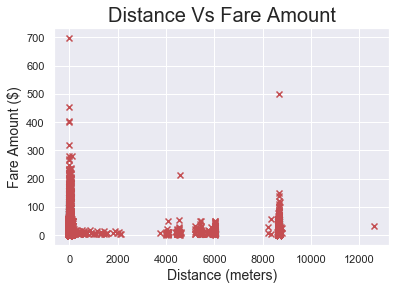

In [ ]:
plt.scatter(training_set['Distance'] , training_set['fare_amount'] , c = 'r' , marker = 'x')
plt.title('Distance Vs Fare Amount',size = 20)
plt.xlabel('Distance (meters)',size = 14)
plt.ylabel('Fare Amount ($)',size = 14)
plt.show()

## Support Vector Regression on Feature Distance 

In [ ]:
data = training_set.sample(n = 100 , replace = False)
X = np.array(data['Distance']).reshape(len(data),1)
y = np.array(data['fare_amount'])


In [ ]:
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1, coef0=1)
y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)
y_poly = svr_poly.fit(X, y).predict(X)

In [ ]:
lw = 2
svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ['RBF', 'Linear', 'Polynomial']
model_color = ['m', 'c', 'g']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)

for ix, svr in enumerate(svrs):
    axes[ix].plot(X, svr.fit(X, y).predict(X), color=model_color[ix], lw=lw,
                  label='{} model'.format(kernel_label[ix]))
    axes[ix].scatter(X[svr.support_], y[svr.support_], facecolor="none",
                     edgecolor=model_color[ix], s=50,
                     label='{} support vectors'.format(kernel_label[ix]))
    axes[ix].scatter(X[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     y[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     facecolor="none", edgecolor="k", s=50,
                     label='other training data')
    axes[ix].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
                    ncol=1, fancybox=True, shadow=True)

fig.text(0.5, 0.04, 'data', ha='center', va='center')
fig.text(0.06, 0.5, 'target', ha='center', va='center', rotation='vertical')
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()
